In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from os import mkdir
from os.path import join, exists

from albumentations import (
    Compose, OneOf, Rotate,
    RandomBrightness, IAAAdditiveGaussianNoise, GaussNoise,
    OpticalDistortion, GridDistortion, IAAPiecewiseAffine,
    IAASharpen, IAAEmboss, RandomContrast, HueSaturationValue,
    HorizontalFlip, Normalize, RandomGamma, RGBShift,
    Blur, MedianBlur, CLAHE, ToGray, JpegCompression,
    RandomSizedCrop
)

from pascal_voc_data import PascalVocGenerator

%matplotlib inline
%load_ext autoreload
%autoreload 2

Using TensorFlow backend.


In [2]:
train_generator = PascalVocGenerator(
    '/data/VOC2012/ImageSets/Segmentation/trainval.txt',
    '/data/VOC2012/JPEGImages/',
    '/data/VOC2012/SegmentationClass/',
    2, (512, 512), False, None, 1
)

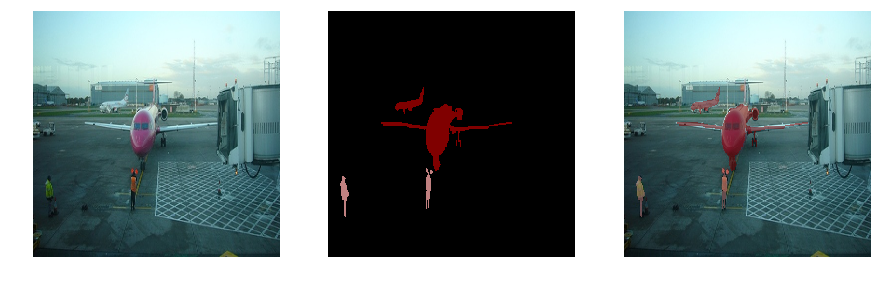

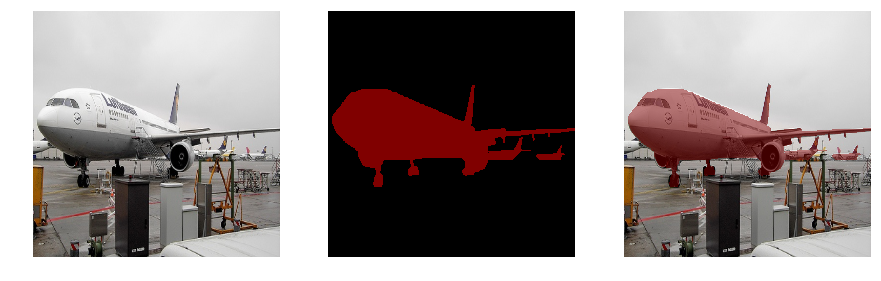

In [3]:
for imgs, masks in train_generator:
    for img, mask in zip(imgs, masks):
        PascalVocGenerator.segmentation_plot(img, train_generator.categorical_to_mask(mask)).show()
    break

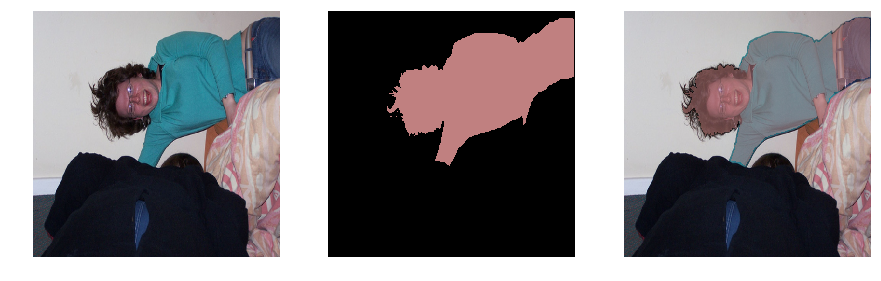

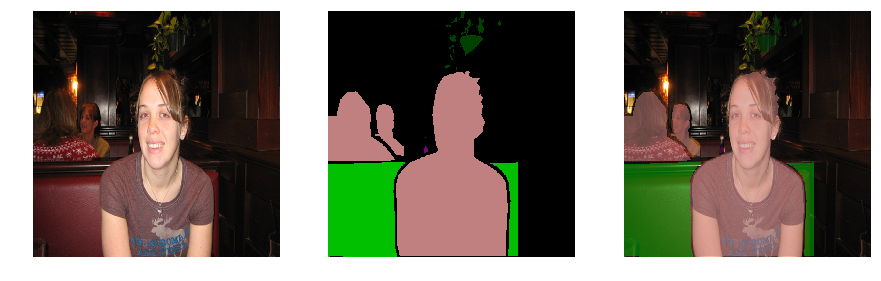

In [4]:
train_generator.on_epoch_end()
for imgs, masks in train_generator:
    for img, mask in zip(imgs, masks):
        PascalVocGenerator.segmentation_plot(img, train_generator.categorical_to_mask(mask)).show()
    break

In [10]:
train_aug = Compose([
    OneOf([
        RandomBrightness(),
        RandomContrast(),
        RandomGamma()
    ], p=0.65),
    OneOf([
        GaussNoise(),
        HueSaturationValue(),
        RGBShift()
    ], p=0.5),
    OneOf([
        OpticalDistortion(p=0.3),
        GridDistortion(p=.1),
        IAAPiecewiseAffine(p=0.3),
    ], p=0.3),
    OneOf([
        Blur(),
        MedianBlur()
    ], p=0.5),
    OneOf([
        CLAHE(),
        ToGray(),
        JpegCompression()
    ], p=0.2),
    HorizontalFlip(p=0.5),
    Rotate(limit=45, p=0.5),
    Normalize(p=1),
])

train_generator_aug = PascalVocGenerator(
    '/data/VOC2012/ImageSets/Segmentation/train.txt',
    '/data/VOC2012/JPEGImages/',
    '/data/VOC2012/SegmentationClass/',
    5, (512, 512), True, train_aug, 1
)

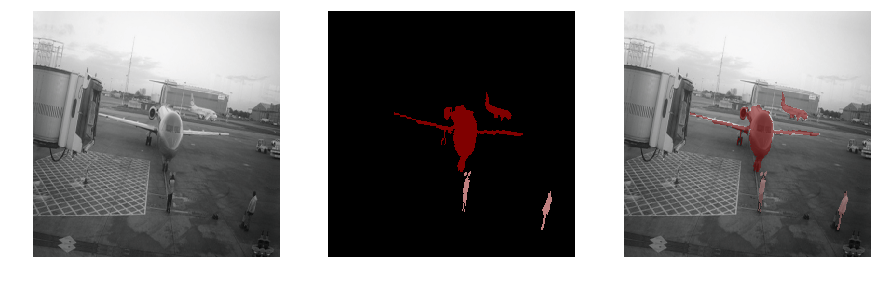

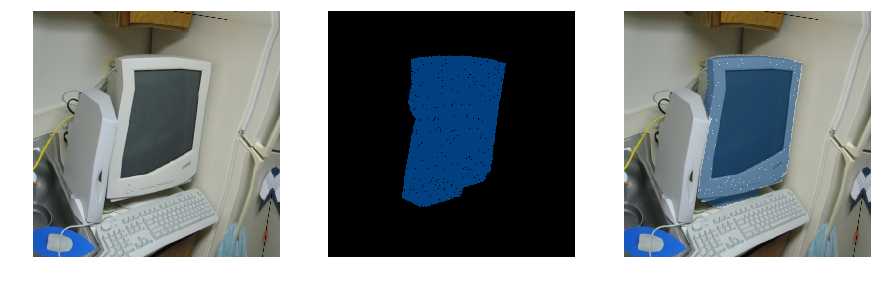

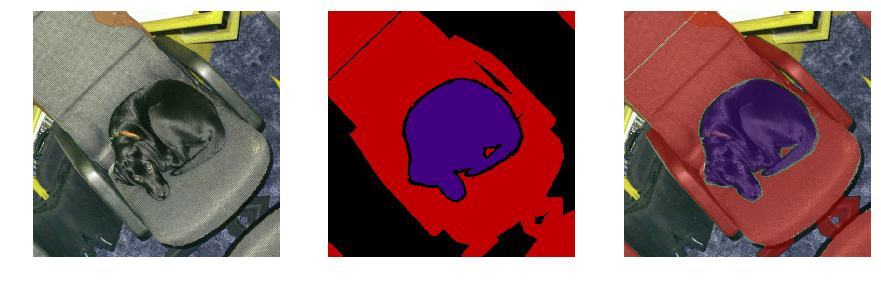

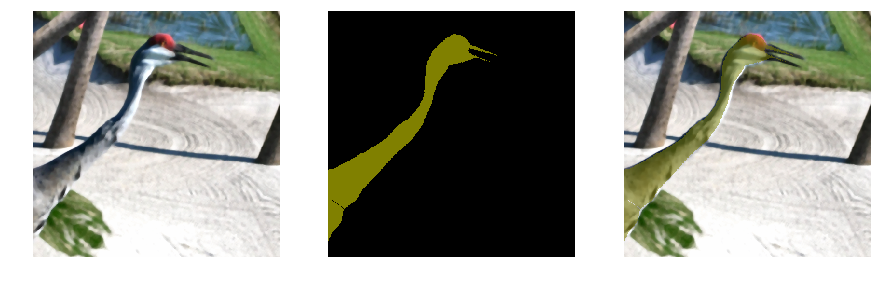

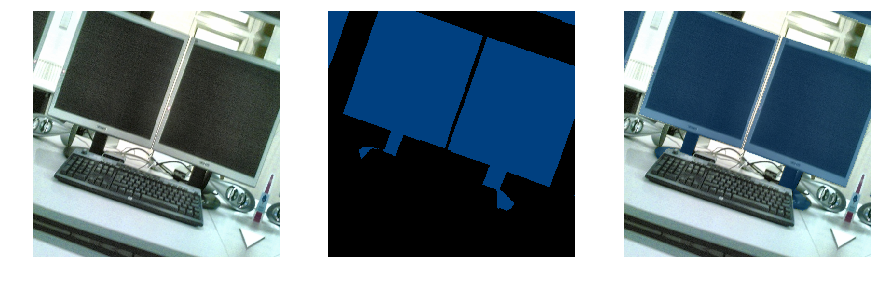

In [11]:
for imgs, masks in train_generator_aug:
    for img, mask in zip(imgs, masks):
        cur_img = (
            (img * (0.229, 0.224, 0.225) + (0.485, 0.456, 0.406)) * 255
        ).astype(np.int)
        PascalVocGenerator.segmentation_plot(cur_img, train_generator.categorical_to_mask(mask)).show()
    break